In [2]:
import easyocr
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
IMAGE_PATH = 'img/test.jpeg'

In [6]:
reader = easyocr.Reader(['en'],gpu=False)
result = reader.readtext(IMAGE_PATH)
print(len(result))
print(result)

Using CPU. Note: This module is much faster with a GPU.


6
[([[236, 120], [486, 120], [486, 196], [236, 196]], 'Maths', 0.47139707658658275), ([[769, 115], [885, 115], [885, 179], [769, 179]], '50', 0.9868259278076006), ([[798, 210], [890, 210], [890, 266], [798, 266]], '20', 0.985886469056447), ([[282, 304], [475, 304], [475, 371], [282, 371]], 'PSPE', 0.28809288144111633), ([[810, 294], [906, 294], [906, 350], [810, 350]], '35', 0.9434034664548955), ([[325.12703119981626, 215.1970466391365], [449.1260403000712, 201.5027689113736], [453.87296880018374, 279.8029533608635], [329.8739596999288, 293.4972310886264]], 'OS', 0.3298922522355304)]


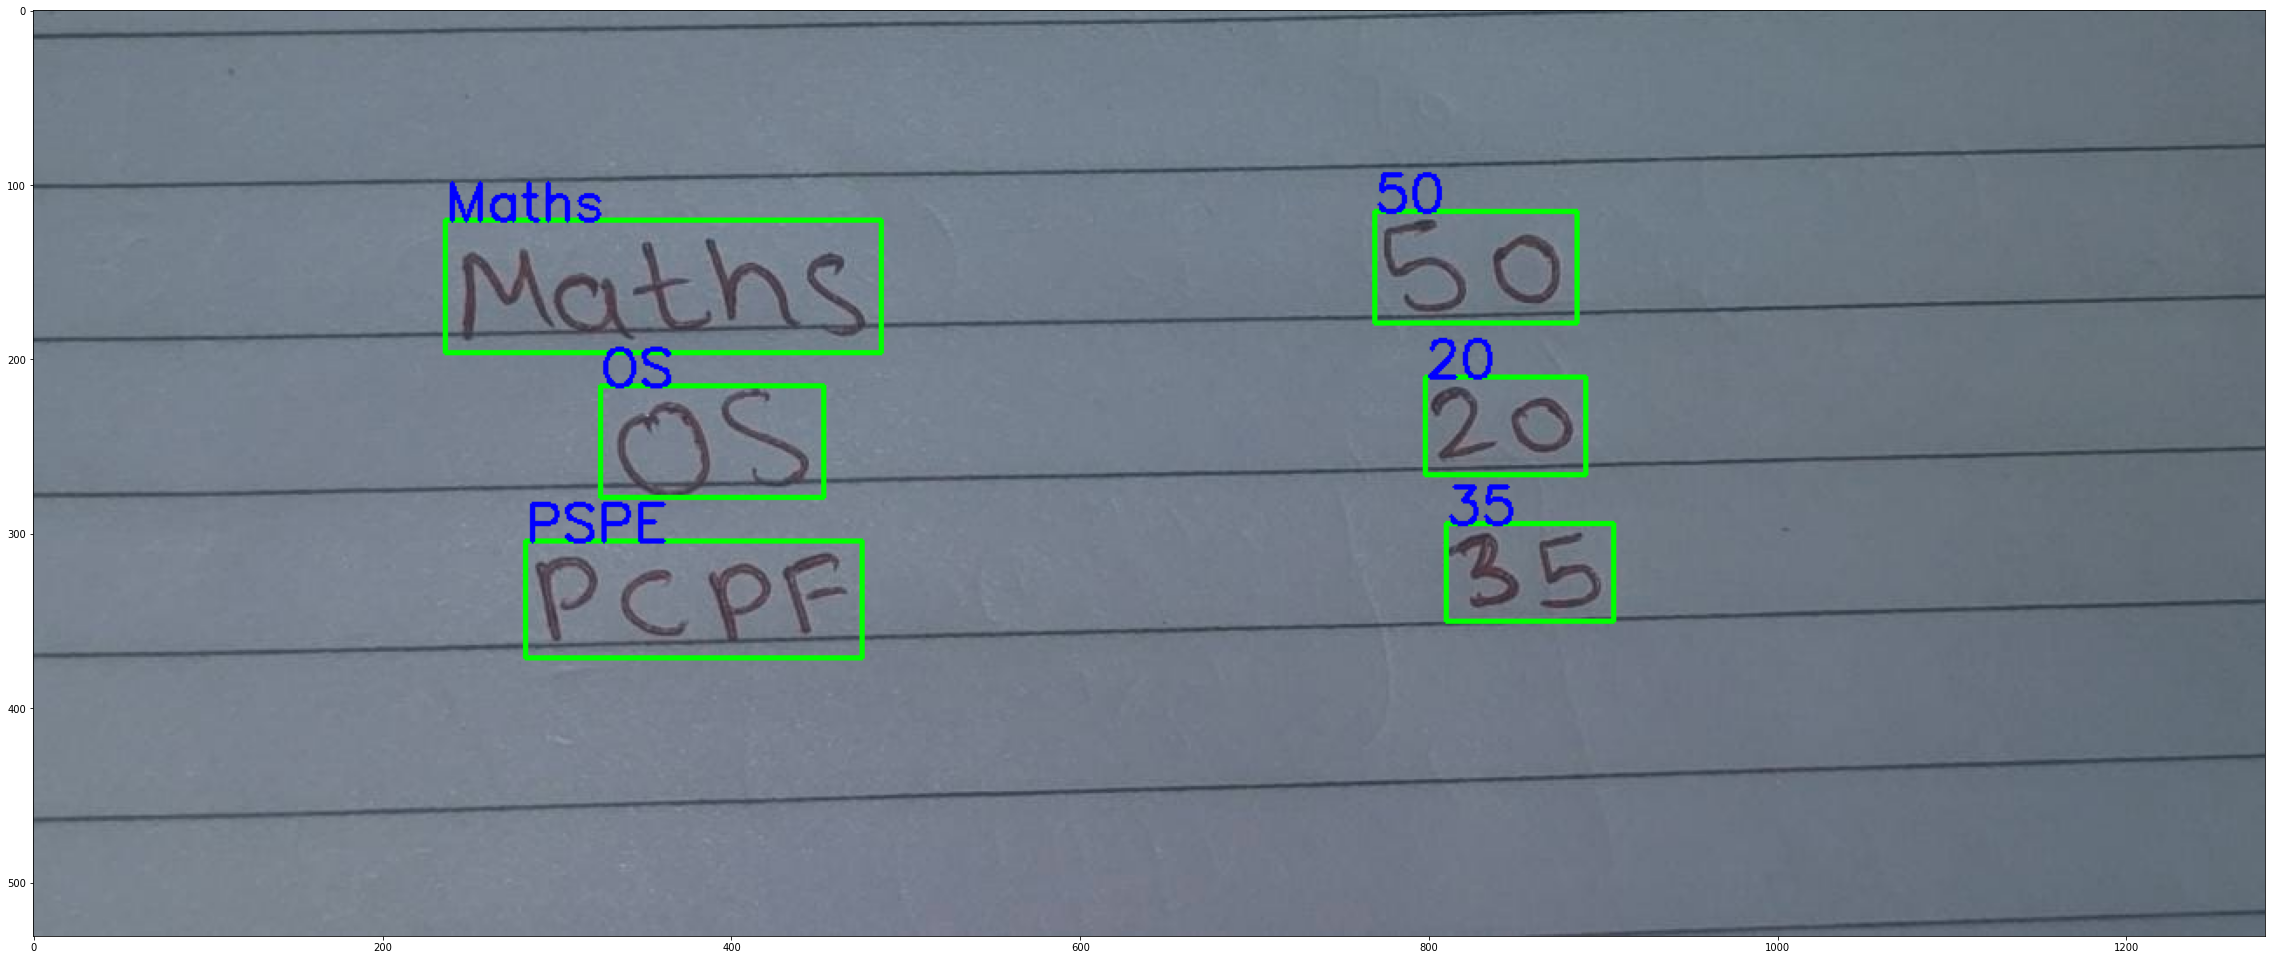

In [15]:
img = cv.imread(IMAGE_PATH)
font = cv.FONT_HERSHEY_SIMPLEX
for i in range(len(result)):
    try:
        cv.rectangle(img, tuple(result[i][0][0]), tuple(result[i][0][2]), (0,255,0), 2)
        cv.putText(img, result[i][1], tuple(result[i][0][0]), font, 1, (0,0,255), 2)
    except:
        numbers = [ int(x) for x in result[i][0][0] ]
        numbers2 = [ int(x) for x in result[i][0][2] ]
        cv.rectangle(img, numbers, numbers2, (0,255,0), 2)
        cv.putText(img, result[i][1], numbers, font, 1, (0,0,255), 2)
plt.figure(figsize=(40,40))
plt.imshow(img)
plt.show()